In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path="chest_xray"
bs = 32
np.random.seed(42)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#defaults.device = device
defaults.device = device
print(defaults.device)

cuda:0


In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), 
                                  size=224, num_workers=0, 
                                  bs=bs, valid_pct=0.2).normalize(imagenet_stats)

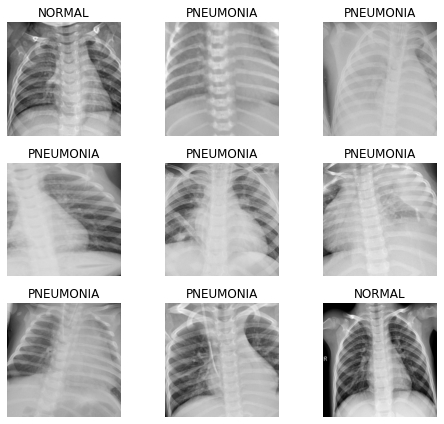

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, model_dir="models/tmp")

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.298158,0.178895,0.061913,25:56
1,0.182611,0.189506,0.062340,30:27
2,0.143143,0.140632,0.054227,26:01
3,0.123818,0.122378,0.047395,26:07


In [9]:
learn.save('stage-1')

In [26]:
learn.export(os.path.abspath('./models/tmp/stage-1_2.pkl'))

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

In [20]:
losses, idx = interp.top_losses()
print(f"{losses}  {idx}")

tensor([5.6920e+00, 5.6479e+00, 5.0828e+00,  ..., 1.0729e-06, 1.0729e-06,
        9.5367e-07])  tensor([ 386,  498,  125,  ..., 1484, 1638, 1301])


In [22]:
len(data.valid_ds)==len(losses)==len(idx)

True

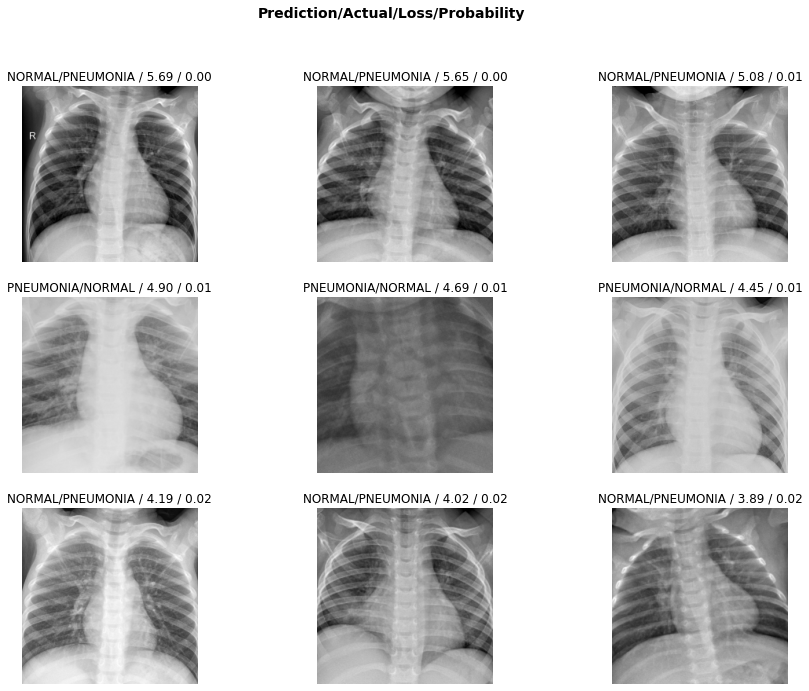

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

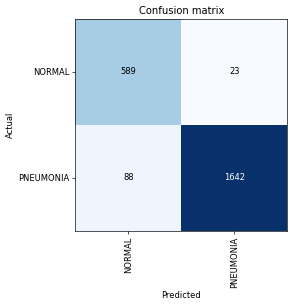

In [24]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

NORMAL
tensor([0.5652, 0.4348])


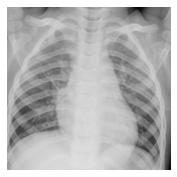

In [132]:
img = open_image(os.path.abspath('./test/n3.jpeg'))
img = img.apply_tfms(tfms=get_transforms()[1], size=224, resize_method=1)
img.show()
pred_class, pred_idx, outputs = learn.predict(img)
print(pred_class.obj)

print(outputs)


PNEUMONIA
tensor([0.0014, 0.9986])


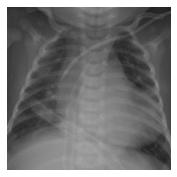

In [131]:
img = open_image(os.path.abspath('./test/p2.jpeg'))
img = img.apply_tfms(tfms=get_transforms()[1], size=224, resize_method=1)
img.show()
pred_class, pred_idx, outputs = learn.predict(img)
print(pred_class.obj)

print(outputs)
